# Mestrado 2023 - Implementações

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [80]:
# Import data
data = pd.read_csv("../Datasets/italy_regions.csv") 

cities = ['Lombardia', 'Lazio', 'Campania', 'Veneto', 'Sicilia']

city_name = 'Sicilia' #region 
indicator='ICU Admissions'

In [81]:
data.columns

Index(['Unnamed: 0', 'data', 'denominazione_regione', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'deceduti',
       'totale_casi', 'ingressi_terapia_intensiva'],
      dtype='object')

In [82]:
# Filtra região de interesse
data = data[data['denominazione_regione'] == city_name]

# Get daily indicator
daily_data = data['terapia_intensiva']

In [83]:
data.data.tolist()[780]

'2022-04-14T17:00:00'

In [84]:
data.data.tolist()[951]

'2022-10-02T17:00:00'

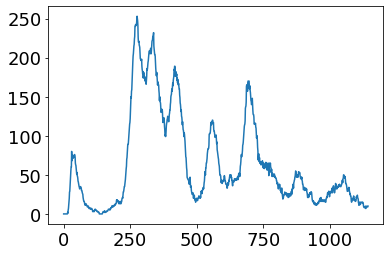

In [85]:
plt.plot(np.linspace(0, len(daily_data)-1, len(daily_data)), daily_data)

In [86]:
max(daily_data)

253

In [87]:
# Get cummulative indicator from daily data
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

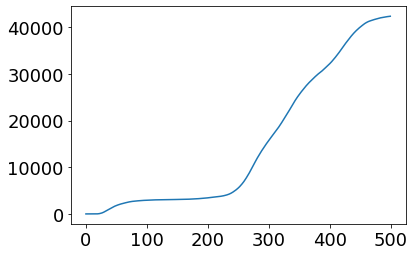

In [88]:
plt.plot(acc_data[:500])

In [89]:
# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

#scaling_factor = 1000
scaling_factor = max(acc_data)
#scaling_factor = 1

acc_data = np.array(acc_data) / scaling_factor
daily_data = list(daily_data/ scaling_factor)

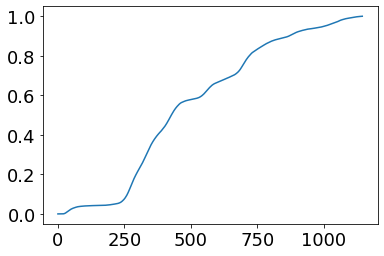

In [90]:
plt.plot(normalized_acc_data)

In [91]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

In [92]:
if (city_name == 'Campania'):
    tp_threshold = 3e-6
elif (city_name == 'Veneto'):
    # new automatic Veneto 2e-6
    tp_threshold = 2e-6
elif (city_name == 'Sicilia'):
    tp_threshold = 5e-6
else:
    tp_threshold = 1e-6

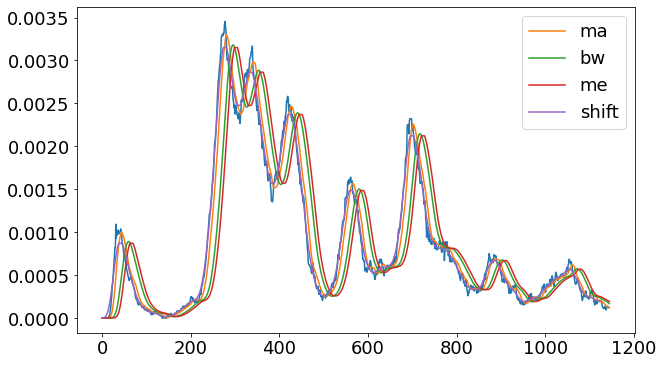

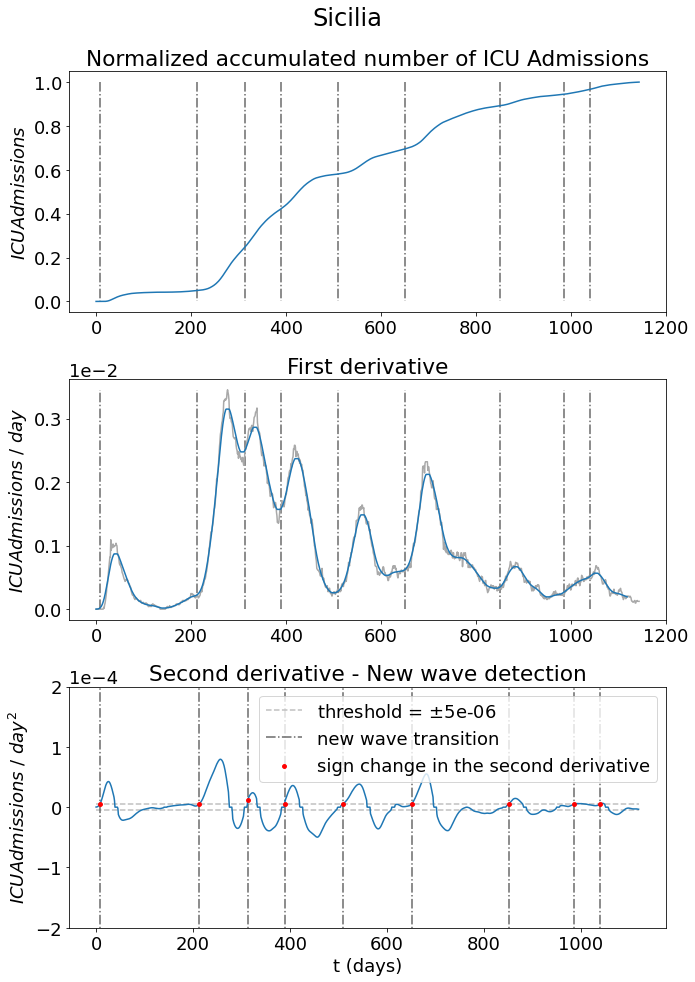

x_nw: [213, 313, 389, 509, 651, 852]


In [93]:
# Transition Points
x_nw = get_transition_points(scaling_factor*acc_data, visual=True, threshold=tp_threshold, indicator = indicator, city_name=city_name)

if (city_name == 'Campania' or city_name == 'Sicilia'):
    x_nw = x_nw[1:7] # Campania e Sicilia
else:
    x_nw = x_nw[:6]


print('x_nw:', x_nw)

In [94]:
#x_nw = [189, 361, 532, 630, 865, 1144]

In [95]:
x_nw

[213, 313, 389, 509, 651, 852]

In [96]:
if (x_nw[-1] != len(acc_data) - 1):
    x_nw.append(len(acc_data) - 1)  

In [97]:
city_name

'Sicilia'

In [98]:
# utilizando scaling_factor = max(acc_data)

if (city_name == 'Lombardia'):
    # Manual (old)
    #x_nw = [189, 361, 532, 630, 865, 1144]

    # New automatic Lombardia
    x_nw = [174, 356, 523, 624, 856, 951]
elif (city_name == 'Lazio'):
    # New automatic Lazio
    x_nw = [187, 373, 514, 609, 839, 950]
elif (city_name == 'Campania'):
    # New automatic Campania 3e-6 x_nw[1:7]
    x_nw =  [184, 337, 525, 625, 646, 780]
elif (city_name == 'Veneto'):
    # new automatic Veneto 2e-6
    x_nw =  [183, 371, 506, 612, 800, 845]
elif (city_name == 'Sicilia'):
    #x_nw = [156, 320, 396, 513, 635, 852, 973] # com ITSE_norm e scaling_factor = 1000

    # Siscilia 5e-6 manual (213 -> 150) com th 5e-6 x_nw[1:7]
    x_nw = [150, 313, 389, 509, 651, 852]


In [99]:
#x_nw = [150, 313, 389, 509, 651, 852]

### Ajuste do modelo utilizando ITSE_norm

/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #1 - A0:0.04110896241043945 | tp0:47.24512785841472 | delta0:12.36764064793769 | nu0:1.0 
n_days: 150 | len(y_m): 150
RMSE: 0.0006091867243405014 | Max(acc_data): 0.042193516672583774 | Rel. RMSE: 1.444%
(optimal) Sigmoid #1 - A0:0.04110896241043945 | tp0:47.24512785841472 | delta0:12.36764064793769 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:0.22671243168612049 | tp0:278.9335246984965 | delta0:17.403185321484834 | nu0:1.0 
n_days: 313 | len(y_m): 313
RMSE: 0.0027969054609322578 | Max(acc_data): 0.24371193707840622 | Rel. RMSE: 1.148%
(optimal) Sigmoid #2 - A0:0.22671243168612049 | tp0:278.9335246984965 | delta0:17.403185321484834 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:0.17398729243376682 | tp0:337.8336871549944 | delta0:13.264487238761578 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


n_days: 389 | len(y_m): 389
RMSE: 0.001222161172803966 | Max(acc_data): 0.4195728759865636 | Rel. RMSE: 0.291%


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/optimize.py:304: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout(rect=[0, 0, 1, 0.98])


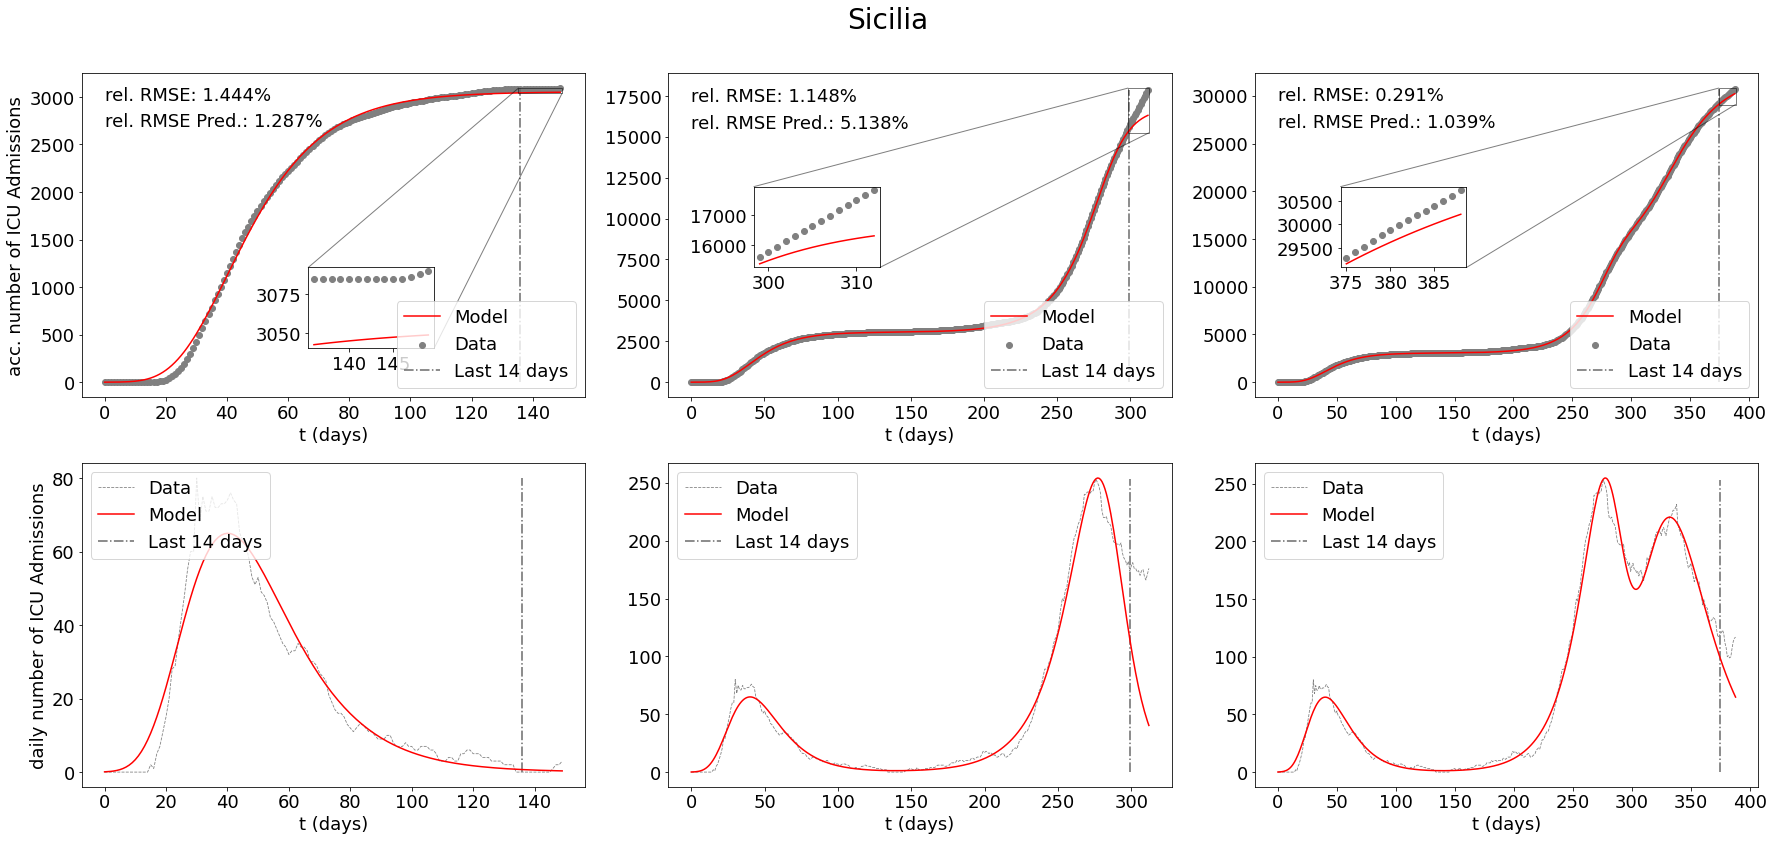

In [100]:
sig_params, rel_rmse_list, rel_rmse_list_pred, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw[:3], 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'ITSE',
                               transpose = True
                            )



In [101]:
data['data'].to_list()[1130]

'2023-03-30T17:00:00'

In [102]:
rel_rmse_list

['1.444%', '1.148%', '0.291%']

In [103]:
rel_rmse_list_pred

['1.287%', '5.138%', '1.039%']

In [104]:
pd.DataFrame({
                'Relative RMSE':rel_rmse_list,
                'Relative RMSE (Predictions)':rel_rmse_list_pred,
              })

,Relative RMSE,Relative RMSE (Predictions)
0,1.444%,1.287%
1,1.148%,5.138%
2,0.291%,1.039%
